In [654]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import openpyxl
import warnings
warnings.filterwarnings("ignore")
file_path = r"C:\Users\mrjoj\OneDrive\Desktop\008272 - Analyst Data Science - Technical Assessment - Data.xlsx"

In [655]:
#workbook = openpyxl.load_workbook(file_path)
#print(workbook.sheetnames)

In [656]:
data_general = pd.read_excel(file_path,sheet_name='Dataset 1 - General')
data_underwriting = pd.read_excel(file_path,sheet_name='Dataset 2 - Underwriting')

Data Cleaning

In [657]:
def data_cleaning(dataframe):
    ## Renaming the Firm Column from Unnamed to Firms
    dataframe = dataframe.rename(columns = {'Unnamed: 0':'Firms'}) 
    
    ## Replacing NaN Values with empty string
    dataframe = dataframe.fillna('')                               
    
    ## Setting the index of the dataframe as the firm name
    dataframe.index = dataframe['Firms']
    
    ## Dropping the redundant 'Firms' column
    dataframe = dataframe.drop('Firms',axis=1)
    
    ## Removing duplicate rows in the dataframe
    dataframe = dataframe.drop_duplicates()
    
    ## Dropping the first row as it only contains column names
    dataframe = dataframe.iloc[1:]
    
    return dataframe

In [658]:
data_general = data_cleaning(data_general)
data_underwriting = data_cleaning(data_underwriting) 

Feature Engineering to help understand the data in depth. 

In [659]:
## Calculating Means across all the years for given metrics. 
data_general['Mean GWP (£m)'] = data_general[['GWP (£m)','GWP (£m).1', 'GWP (£m).2', 'GWP (£m).3', 'GWP (£m).4']].mean(axis=1)
data_general['Mean NWP (£m)'] = data_general[['NWP (£m) ', 'NWP (£m) .1', 'NWP (£m) .2', 'NWP (£m) .3','NWP (£m) .4']].mean(axis=1)
data_general['Mean SCR Ratio'] = data_general[['SCR coverage ratio', 'SCR coverage ratio.1', 'SCR coverage ratio.2','SCR coverage ratio.3', 'SCR coverage ratio.4']].mean(axis=1)
data_underwriting['Mean Gross Claims Incurred'] = data_underwriting[['Gross claims incurred (£m).1','Gross claims incurred (£m).2', 'Gross claims incurred (£m).3','Gross claims incurred (£m).4']].mean(axis=1)
data_underwriting['Mean Net Combined Ratio'] = data_underwriting[['Net combined ratio', 'Net combined ratio.1', 'Net combined ratio.2','Net combined ratio.3', 'Net combined ratio.4']].mean(axis=1)

In [660]:
## Calculating Standard Deviations across all the years for given metrics. 
data_general['STD in GWP (£m)'] = data_general[['GWP (£m)','GWP (£m).1', 'GWP (£m).2', 'GWP (£m).3', 'GWP (£m).4']].std(axis=1)
data_general['STD in NWP (£m)'] = data_general[['NWP (£m) ', 'NWP (£m) .1', 'NWP (£m) .2', 'NWP (£m) .3','NWP (£m) .4']].std(axis=1)
data_general['STD in SCR Ratio'] = data_general[['SCR coverage ratio', 'SCR coverage ratio.1', 'SCR coverage ratio.2','SCR coverage ratio.3', 'SCR coverage ratio.4']].std(axis=1)
data_underwriting['STD in Gross Claims Incurred'] = data_underwriting[['Gross claims incurred (£m).1','Gross claims incurred (£m).2', 'Gross claims incurred (£m).3','Gross claims incurred (£m).4']].std(axis=1)
data_underwriting['STD in Net Combined Ratio'] = data_underwriting[['Net combined ratio', 'Net combined ratio.1', 'Net combined ratio.2','Net combined ratio.3', 'Net combined ratio.4']].std(axis=1)

In [661]:
def calculate_change(df, col_names):
    """
    This function calculates the change between 5 consecutive columns in a pandas dataframe.
    The difference is calculated by subtracting one column from another. The results are stored in new columns in the same dataframe.
    
    Parameters:
    - df (pandas.DataFrame): The dataframe to operate on
    - col_names (list): A list of column names to calculate the change between
    
    Returns:
    - str: 'Success' indicating the function has run successfully.
    """
    # Loop through the list of column names
    for i in range(1, len(col_names)):
        # Get the name of the first column
        col1 = col_names[i - 1]
        # Get the name of the second column
        col2 = col_names[i]
        # Generate a name for the new column that stores the difference between the two columns
        col_change = f"{col1} to {col2}"
        # Calculate the difference between the two columns and store the result in a new column
        df.loc[:, col_change] = df[col2] - df[col1]
        # Replace any infinite values with NaN
        df[col_change].replace([np.inf, -np.inf], np.nan, inplace=True)
        # Fill any NaN values with 0
        df[col_change].fillna(value=0, inplace=True)
    return 'Success'


In [662]:
#Calculating Change Across all the columns
calculate_change(data_general,['GWP (£m)','GWP (£m).1', 'GWP (£m).2', 'GWP (£m).3', 'GWP (£m).4'])
calculate_change(data_general,['NWP (£m) ', 'NWP (£m) .1', 'NWP (£m) .2', 'NWP (£m) .3','NWP (£m) .4'])
calculate_change(data_general,['SCR coverage ratio', 'SCR coverage ratio.1', 'SCR coverage ratio.2','SCR coverage ratio.3', 'SCR coverage ratio.4'])
calculate_change(data_underwriting,['Gross claims incurred (£m)','Gross claims incurred (£m).1','Gross claims incurred (£m).2', 'Gross claims incurred (£m).3','Gross claims incurred (£m).4'])
calculate_change(data_underwriting,['Net combined ratio', 'Net combined ratio.1', 'Net combined ratio.2','Net combined ratio.3', 'Net combined ratio.4'])

'Success'

Calculating Average Metric values across other columns. It might not be useful in EDA Phase, but will be important in ML Phase. 

In [663]:
data_general['Mean EoF SCR'] = data_general[[ 'EoF for SCR (£m)', 'EoF for SCR (£m).1','EoF for SCR (£m).2', 'EoF for SCR (£m).3', 'EoF for SCR (£m).4']].mean(axis=1)
data_general['Mean Total Assets (£m)'] = data_general[['Total assets (£m)', 'Total assets (£m).1', 'Total assets (£m).2','Total assets (£m).3', 'Total assets (£m).4']].mean(axis=1)
data_general['Mean Total Liabilities'] = data_general[['Total liabilities (£m)','Total liabilities (£m).1', 'Total liabilities (£m).2','Total liabilities (£m).3', 'Total liabilities (£m).4']].mean(axis=1)

Plotting the Correlation Matrix for General Data to understand the relation between metrics.

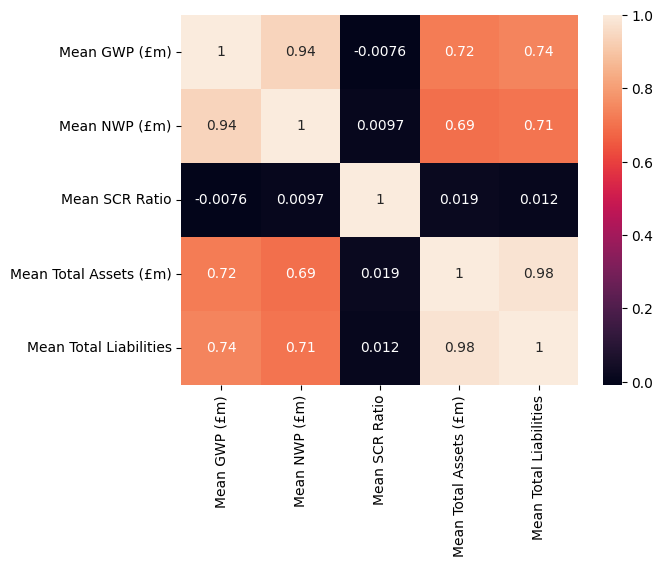

In [664]:
Correlation_Data = data_general[['Mean GWP (£m)','Mean NWP (£m)', 'Mean SCR Ratio','Mean Total Assets (£m)', 'Mean Total Liabilities']]
# Calculate the Pearson correlation matrix for the dataframe
correlation_matrix = Correlation_Data.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()


The values in the matrix range from -1 to 1 and represent the strength and direction of the relationship between each pair of variables. A positive value indicates a positive correlation, meaning that as one variable increases, the other variable also increases. A negative value indicates a negative correlation, meaning that as one variable increases, the other decreases. 

In [665]:
## Calculating Mean of Metrics in the second dataframe over the span of 5 years. 
data_underwriting['Mean BEL Inc TPs'] = data_underwriting[['Gross BEL (inc. TPs as whole, pre-TMTP) (£m)','Gross BEL (inc. TPs as whole, pre-TMTP) (£m).1','Gross BEL (inc. TPs as whole, pre-TMTP) (£m).2','Gross BEL (inc. TPs as whole, pre-TMTP) (£m).3','Gross BEL (inc. TPs as whole, pre-TMTP) (£m).4']].mean(axis=1)
data_underwriting['Mean Net BEL Inc TPs'] = data_underwriting[['Net BEL (inc. TPs as a whole, pre-TMTP) (£m)','Net BEL (inc. TPs as a whole, pre-TMTP) (£m).1','Net BEL (inc. TPs as a whole, pre-TMTP) (£m).2','Net BEL (inc. TPs as a whole, pre-TMTP) (£m).3','Net BEL (inc. TPs as a whole, pre-TMTP) (£m).4']].mean(axis=1)
data_underwriting['Mean Pure Gross Claims Ratio'] = data_underwriting[['Pure gross claims ratio', 'Pure gross claims ratio.1','Pure gross claims ratio.2', 'Pure gross claims ratio.3','Pure gross claims ratio.4']].mean(axis=1)
data_underwriting['Mean Net Expense Ratio'] = data_underwriting[['Net expense ratio', 'Net expense ratio.1','Net expense ratio.2', 'Net expense ratio.3', 'Net expense ratio.4']].mean(axis=1)
data_underwriting['Mean Gross Expense Ratio'] = data_underwriting[['Gross expense ratio','Gross expense ratio.1', 'Gross expense ratio.2','Gross expense ratio.3', 'Gross expense ratio.4']].mean(axis=1)
data_underwriting['Mean Gross Combined Ratio'] = data_underwriting[['Gross combined ratio', 'Gross combined ratio.1','Gross combined ratio.2', 'Gross combined ratio.3','Gross combined ratio.4']].mean(axis=1)

<AxesSubplot: >

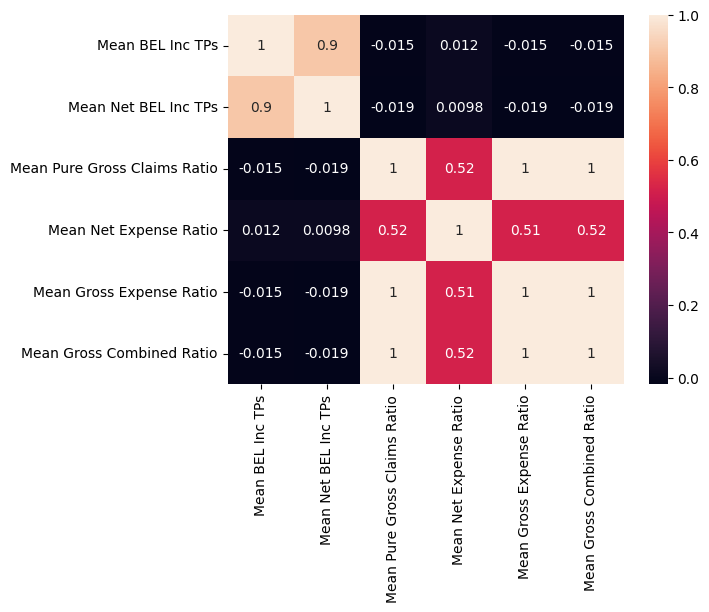

In [666]:
Correlation_Data_2 = data_underwriting[['Mean BEL Inc TPs','Mean Net BEL Inc TPs','Mean Pure Gross Claims Ratio','Mean Net Expense Ratio','Mean Gross Expense Ratio','Mean Gross Combined Ratio']]

# Calculate the Pearson correlation matrix for the dataframe
correlation_matrix_2 = Correlation_Data_2.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix_2, annot=True)

In this correlation matrix, we can see that Mean Bel and Net Bel, Gross Claims and Gross Expense are highly correlated along with others. The high correlation between these variables indicates that they tend to change together and have a strong relationship

Plotting a scatter plot between Mean NWP and Mean NCR to understand their relationship.

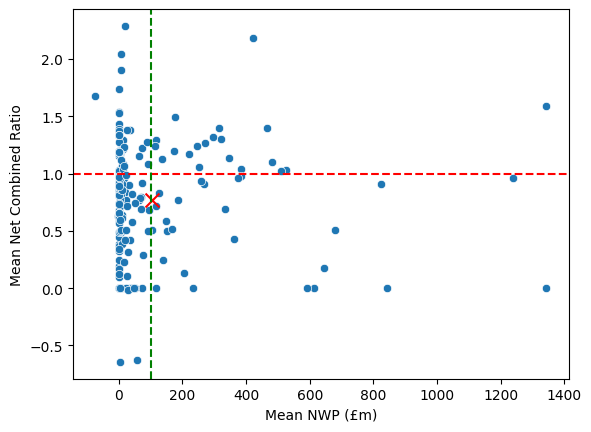

In [667]:
# Merge the two dataframes data_General and data_underwriting on their indexes
joined_datasets = data_general.merge(data_underwriting, left_index=True, right_index=True, how='inner')

# Remove outliers from two columns
col1 = "Mean NWP (£m)"
col2 = "Mean Net Combined Ratio"

# Calculate Q1 and Q3 for the first column
Q1 = joined_datasets[col1].quantile(0.15)
Q3 = joined_datasets[col1].quantile(0.85)
IQR = Q3 - Q1

# Remove outliers from the first column
joined_datasets = joined_datasets[(joined_datasets[col1] >= Q1 - 1.5 * IQR) & (joined_datasets[col1] <= Q3 + 1.5 * IQR)]

# Calculate Q1 and Q3 for the second column
Q1 = joined_datasets[col2].quantile(0.15)
Q3 = joined_datasets[col2].quantile(0.85)
IQR = Q3 - Q1

# Remove outliers from the second column
joined_datasets = joined_datasets[(joined_datasets[col2] >= Q1 - 1.5 * IQR) & (joined_datasets[col2] <= Q3 + 1.5 * IQR)]

# Calculate the mean values for the two columns
mean_x = np.mean(joined_datasets[col1])
mean_y = np.mean(joined_datasets[col2])

# Create a scatter plot of the two columns
sns.scatterplot(x=col1, y=col2, data=joined_datasets)

# Add a horizontal line at 1.00 to show the cut-off for profitability
plt.axhline(y = 1.00, color='red', linestyle='--')

# Add a red x at the mean values of the two columns
plt.scatter(mean_x, mean_y, color='red', s=100, marker='x')

# Add a vertical line at 100
plt.axvline(100, color='green', linestyle='--')

# Show the plot
plt.show()


In [669]:
joined_datasets[['Mean NWP (£m)']][(joined_datasets['Mean Net Combined Ratio'] > 1) & (joined_datasets['Mean NWP (£m)'] > 100)].sort_values(by='Mean NWP (£m)',ascending=False).to_clipboard()

Plotting a scatter plot between Mean GWP and Mean SCR to understand their relationship.

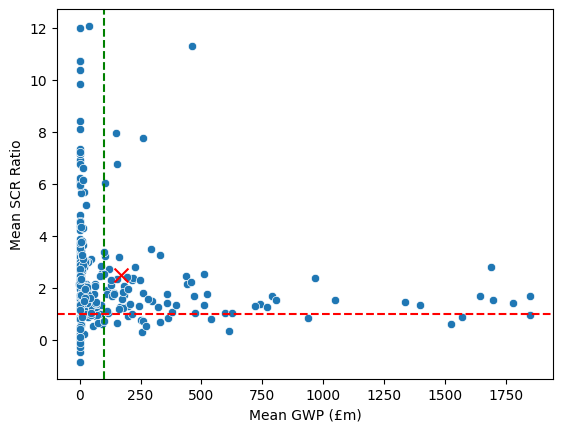

In [331]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter the relevant data for SCR and GWP
SCR_GWP_Data = data_general[['Mean GWP (£m)', 'Mean SCR Ratio']]

# Select the columns to be used for the scatter plot
col1 = 'Mean GWP (£m)'
col2 = 'Mean SCR Ratio'

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the first column
Q1 = SCR_GWP_Data[col1].quantile(0.15)
Q3 = SCR_GWP_Data[col1].quantile(0.85)
IQR = Q3 - Q1

# Remove outliers from the first column using the calculated IQR
SCR_GWP_Data = SCR_GWP_Data[(SCR_GWP_Data[col1] >= Q1 - 1.5 * IQR) & (SCR_GWP_Data[col1] <= Q3 + 1.5 * IQR)]

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the second column
Q1 = SCR_GWP_Data[col2].quantile(0.15)
Q3 = SCR_GWP_Data[col2].quantile(0.85)
IQR = Q3 - Q1

# Remove outliers from the second column using the calculated IQR
SCR_GWP_Data = SCR_GWP_Data[(SCR_GWP_Data[col2] >= Q1 - 1.5 * IQR) & (SCR_GWP_Data[col2] <= Q3 + 1.5 * IQR)]

# Calculate the mean for the first and second columns
mean_x = np.mean(SCR_GWP_Data[col1])
mean_y = np.mean(SCR_GWP_Data[col2])

# Create a scatter plot of the filtered data
sns.scatterplot(x=col1, y=col2, data=SCR_GWP_Data)

# Add a horizontal line at a y-value of 1.00
plt.axhline(y=1.00, color='red', linestyle='--') 

# Add a red x marker at the mean x and y values
plt.scatter(mean_x, mean_y, color='red', s=100, marker='x')

# Add a vertical line at a x-value of 100
plt.axvline(100, color='green', linestyle='--')

# Show the plot
plt.show()


In [674]:
joined_datasets[['Mean GWP (£m)']][(joined_datasets['Mean SCR Ratio'] < 1) & (joined_datasets['Mean GWP (£m)'] > 100)].sort_values(by='Mean GWP (£m)',ascending=False).to_clipboard()

In [675]:
joined_datasets[['Mean GWP (£m)']][(joined_datasets['Mean SCR Ratio'] < 1.25) & (joined_datasets['Mean GWP (£m)'] > 350)].sort_values(by='Mean GWP (£m)',ascending=False).to_clipboard()

Understanding the seasonal relationship between Gross Claims Incurred for different firms. 

Text(0, 0.5, 'Difference in Gross Claims (£m)')

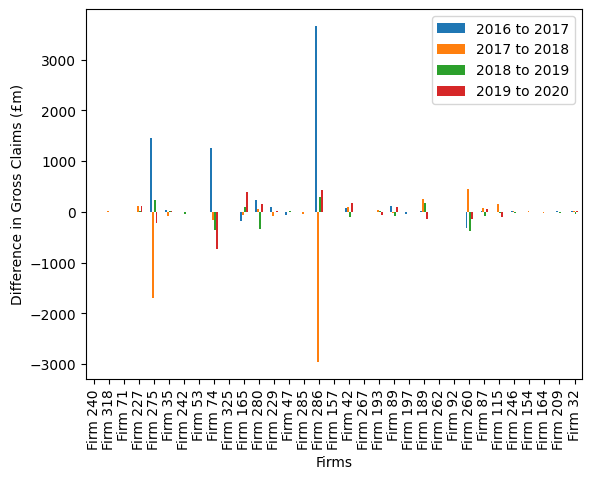

In [653]:
# Load the data into a dataframe
gross_claims_data = joined_datasets[['Gross claims incurred (£m) to Gross claims incurred (£m).1',
       'Gross claims incurred (£m).1 to Gross claims incurred (£m).2',
       'Gross claims incurred (£m).2 to Gross claims incurred (£m).3',
       'Gross claims incurred (£m).3 to Gross claims incurred (£m).4','Mean GWP (£m)','Mean SCR Ratio']] 

# Calculate the lower and upper bounds for the Mean GWP column
q1, q3 = gross_claims_data['Mean GWP (£m)'].quantile([0.15, 0.85])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out the outliers from the Mean GWP column
gross_claims_data = gross_claims_data[(gross_claims_data['Mean GWP (£m)'] > lower_bound) & (gross_claims_data['Mean GWP (£m)'] < upper_bound)]

# Bin the Mean GWP column
max_value = max(gross_claims_data['Mean GWP (£m)'])
bin_edges = np.arange(0, max_value+50, 50)
gross_claims_data['bins'] = pd.cut(gross_claims_data['Mean GWP (£m)'], bin_edges)

# Select the top 20 firms based on Mean GWP
top_firms = gross_claims_data[gross_claims_data['Mean GWP (£m)'] > 150].sort_values(by='Mean GWP (£m)',ascending=False)
top_firms = top_firms[['Gross claims incurred (£m) to Gross claims incurred (£m).1','Gross claims incurred (£m).1 to Gross claims incurred (£m).2',
'Gross claims incurred (£m).2 to Gross claims incurred (£m).3','Gross claims incurred (£m).3 to Gross claims incurred (£m).4']]

# Rename the columns for better readability
top_firms = top_firms.rename(columns = {'Gross claims incurred (£m) to Gross claims incurred (£m).1':'2016 to 2017',
    'Gross claims incurred (£m).1 to Gross claims incurred (£m).2':'2017 to 2018',
'Gross claims incurred (£m).2 to Gross claims incurred (£m).3':'2018 to 2019',
'Gross claims incurred (£m).3 to Gross claims incurred (£m).4':'2019 to 2020'})

top_firms = top_firms.drop_duplicates()

# Plot the data as a bar chart
top_firms.astype(int).plot(kind='bar')

# Add labels to the x and y axes
plt.xlabel("Firms")
plt.ylabel("Difference in Gross Claims (£m)")


In [635]:
# Calculate the average value of each column
mean = top_firms.mean()

# Calculate the standard deviation of each column
std = top_firms.std()

# Define a threshold to determine the significance of deviation
threshold = 2

# Loop through each row and check if the difference from the mean is greater than the threshold times the standard deviation
for index, row in top_firms.iterrows():
    for col in top_firms.columns:
        deviation = abs(row[col] - mean[col])
        if deviation > threshold * std[col]:
            print("Firm {} deviates significantly from the average in the period {} ".format(index, col))


Firm Firm 275 deviates significantly from the average in the period 2017 to 2018 
Firm Firm 74 deviates significantly from the average in the period 2018 to 2019 
Firm Firm 74 deviates significantly from the average in the period 2019 to 2020 
Firm Firm 165 deviates significantly from the average in the period 2019 to 2020 
Firm Firm 280 deviates significantly from the average in the period 2018 to 2019 
Firm Firm 286 deviates significantly from the average in the period 2016 to 2017 
Firm Firm 286 deviates significantly from the average in the period 2017 to 2018 
Firm Firm 286 deviates significantly from the average in the period 2018 to 2019 
Firm Firm 286 deviates significantly from the average in the period 2019 to 2020 
Firm Firm 260 deviates significantly from the average in the period 2018 to 2019 


Text(0, 0.5, 'Difference in Gross Claims (£m)')

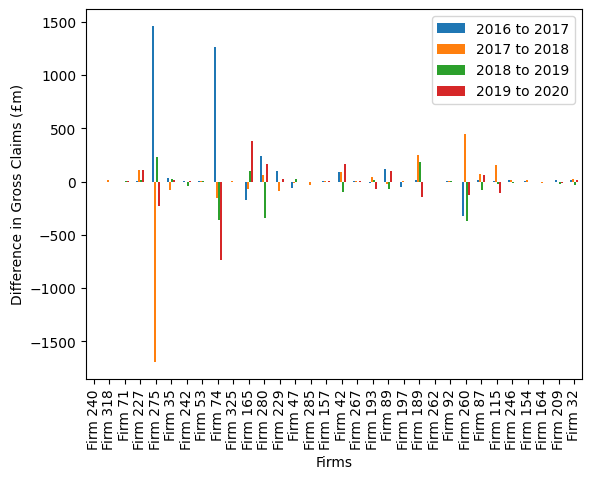

In [636]:
# Calculate the average of each column
mean = top_firms.mean()

# Calculate the standard deviation of each column
std = top_firms.std()

# Define a threshold to determine if a firm deviates significantly from the average
threshold = 2

# Find the indices of the firms that deviate significantly from the average in at least one column
to_drop = top_firms[(top_firms - mean).abs() > threshold * std].dropna().index

# Drop the firms that deviate significantly from the average
top_firms = top_firms.drop(to_drop)

top_firms = top_firms.drop_duplicates()

# Plot the data as a bar chart
top_firms.astype(int).plot(kind='bar')

# Add labels to the x and y axes
plt.xlabel("Firms")
plt.ylabel("Difference in Gross Claims (£m)")


Understanding the GWP - NWP metrics. 

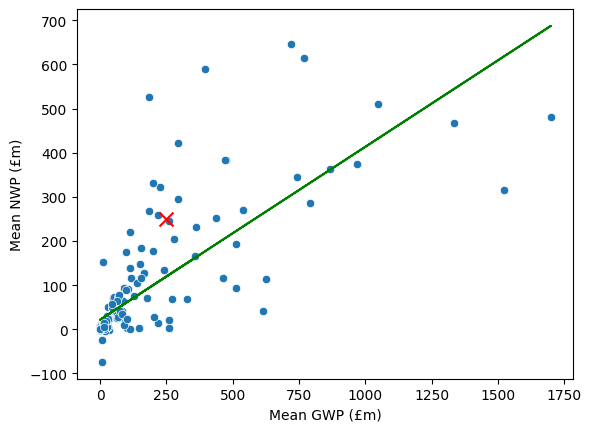

In [699]:
# Merge the two dataframes data_General and data_underwriting on their indexes
joined_datasets = data_general.merge(data_underwriting, left_index=True, right_index=True, how='inner')

# Remove outliers from two columns
col2 = "Mean NWP (£m)"
col1 = "Mean GWP (£m)"

# Calculate Q1 and Q3 for the first column
Q1 = joined_datasets[col1].quantile(0.15)
Q3 = joined_datasets[col1].quantile(0.85)
IQR = Q3 - Q1

# Remove outliers from the first column
joined_datasets = joined_datasets[(joined_datasets[col1] >= Q1 - 1.5 * IQR) & (joined_datasets[col1] <= Q3 + 1.5 * IQR)]

# Calculate Q1 and Q3 for the second column
Q1 = joined_datasets[col2].quantile(0.15)
Q3 = joined_datasets[col2].quantile(0.85)
IQR = Q3 - Q1

# Remove outliers from the second column
joined_datasets = joined_datasets[(joined_datasets[col2] >= Q1 - 1.5 * IQR) & (joined_datasets[col2] <= Q3 + 1.5 * IQR)]

# Calculate the mean values for the two columns
mean_x = np.mean(joined_datasets[col1])
mean_y = np.mean(joined_datasets[col2])

# Create a scatter plot of the two columns
sns.scatterplot(x=col1, y=col2, data=joined_datasets)


# Add a red x at the mean values of the two columns
plt.scatter(mean_x, mean_y, color='red', s=100, marker='x')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(joined_datasets[col1], joined_datasets[col2])
line = slope*np.array(joined_datasets[col1]) + intercept

plt.plot(joined_datasets[col1], line, 'g', label='Regression Line')

# Show the plot
plt.show()


In [701]:
# Finding Firms have higher GWP than NWP 
joined_datasets["risk_indicator"] = (joined_datasets["Mean GWP (£m)"]>joined_datasets["Mean NWP (£m)"]).astype(int)
joined_datasets["Difference (£m)"] = (joined_datasets["Mean GWP (£m)"] - joined_datasets["Mean NWP (£m)"])#.astype(int)
joined_datasets["Ratio NWP/GWP"] = (joined_datasets["Mean GWP (£m)"]/joined_datasets["Mean NWP (£m)"])#.astype(int)
reinsuring_risk_firms = joined_datasets[joined_datasets["risk_indicator"] == 1]
reinsuring_risk_firms[["Mean NWP (£m)","Mean GWP (£m)","Difference (£m)","Ratio NWP/GWP"]].sort_values(by="Difference (£m)",ascending=False).to_clipboard()

Following scatter plot shows us the relation between 3 metrics, GWP, Gross Claims, and Net Combined Ratio.

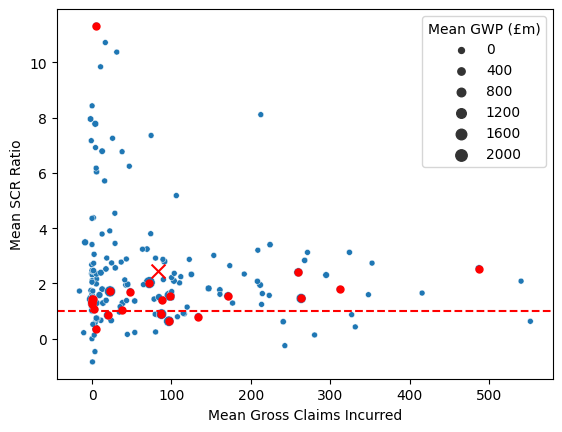

In [684]:
# Filter the relevant data for Gross Claims Incurred and SCR
SCI_SCR_Data = joined_datasets[['Mean Gross Claims Incurred','Mean SCR Ratio','Mean GWP (£m)']] 

# Remove outliers from two columns
col1 = 'Mean Gross Claims Incurred'
col2 = 'Mean SCR Ratio'
Q1 = SCI_SCR_Data[col1].quantile(0.15)
Q3 = SCI_SCR_Data[col1].quantile(0.85)
IQR = Q3 - Q1
SCI_SCR_Data = SCI_SCR_Data[(SCI_SCR_Data[col1] >= Q1 - 1.5 * IQR) & (SCI_SCR_Data[col1] <= Q3 + 1.5 * IQR)]
Q1 = SCI_SCR_Data[col2].quantile(0.15)
Q3 = SCI_SCR_Data[col2].quantile(0.85)
IQR = Q3 - Q1
SCI_SCR_Data = SCI_SCR_Data[(SCI_SCR_Data[col2] >= Q1 - 1.5 * IQR) & (SCI_SCR_Data[col2] <= Q3 + 1.5 * IQR)]

# Calculate means of the two columns
mean_x = np.mean(SCI_SCR_Data[col1])
mean_y = np.mean(SCI_SCR_Data[col2])

# Define size column
size_column = 'Mean GWP (£m)'

# Create a scatter plot of the columns with size defined by the size column
sns.scatterplot(x=col1, y=col2, data=SCI_SCR_Data, size=size_column)

# Add horizontal line for profitability cut off
plt.axhline(y = 1.00, color='red', linestyle='--') 

# Add marker for the mean of the two columns
plt.scatter(mean_x, mean_y, color='red', s=100, marker='x')

highlight = SCI_SCR_Data[SCI_SCR_Data[size_column] > 300]
plt.scatter(highlight[col1], highlight[col2], color='red', s=25)

# Show the plot
plt.show()
